# Metrics and Plots for the trained models

This notebook aims to viz results from metrics that were already saved in `results/scores_tables`

> [!NOTE]  
> normalization only applied to create protein embeddings

## Viz

In [115]:
version='v2.10'
norm='minmax'

In [116]:
import pandas as pd
import sys,os
sys.path.append(os.path.abspath('../../src/ml'))


from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer



In [117]:
avg_df=pd.read_csv('../../results/score_tables/scores_avg_seeds.csv')
all_df=pd.read_csv('../../results/score_tables/scores_all_seeds.csv')

In [118]:
input_data=['Complex_protein_embeddings',
 'RGCN_protein_embeddings',
 'concatenated_protein_embeddings',
 'gene_expression',
 'Complex_sample_embeddings',
 'RGCN_sample_embeddings',
 'concatenated_sample_embeddings']

In [119]:
df=avg_df
filtered_results=df[
        (df['input']=='gene_expression') 
        | ((df['version']==version) & (df['normalization']==norm))
        | (
            (norm != 'none')
            & df['input'].isin([
                'RGCN_sample_embeddings',
                'Complex_sample_embeddings',
                'concatenated_sample_embeddings'
            ])
            & (df['version']==version)
        )
]


For better foucsed results, consider only non pytorch mlp models and CompEx and RGCN only (the others gnns are not done yet)

So run this if metrics files contatin them

In [120]:
# filtered_results=filtered_results[filtered_results['model']!='pytorch_mlp']
# -- only input in input_data
filtered_results=filtered_results[filtered_results['input'].isin(input_data)]

In [121]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
2,pytorch_mlp,Complex_protein_embeddings,minmax,v2.10,0.500000,0.620408,0.800000,0.698851,0.000000,0.678708,0.877657,0.216016
10,pytorch_mlp,Complex_sample_embeddings,none,v2.10,0.500478,0.775893,0.973684,0.863029,-0.005935,0.476316,0.770334,0.194676
14,pytorch_mlp,RGCN_protein_embeddings,minmax,v2.10,0.500000,0.232653,0.300000,0.262069,0.000000,0.500000,0.775510,0.610204
22,pytorch_mlp,RGCN_sample_embeddings,none,v2.10,0.477632,0.611084,0.755263,0.674657,-0.071109,0.477632,0.768166,0.369388
26,pytorch_mlp,concatenated_protein_embeddings,minmax,v2.10,0.500000,0.155102,0.200000,0.174713,0.000000,0.500000,0.775510,0.665306
34,pytorch_mlp,concatenated_sample_embeddings,none,v2.10,0.500718,0.765823,0.510526,0.470310,0.007103,0.500718,0.776327,0.493878
36,pytorch_mlp,gene_expression,none,no version,0.500000,0.775510,1.000000,0.873563,0.000000,0.815311,0.934362,0.177868
39,random_forest,Complex_protein_embeddings,minmax,v2.10,0.875837,0.938053,0.978947,0.957585,0.802802,0.978589,0.993864,0.064308
47,random_forest,Complex_sample_embeddings,none,v2.10,0.497368,0.774575,0.994737,0.870944,-0.015532,0.424402,0.745223,0.193475
51,random_forest,RGCN_protein_embeddings,minmax,v2.10,0.620455,0.823355,0.950000,0.881402,0.335878,0.758014,0.902494,0.146610


### 1. grouped bar plots

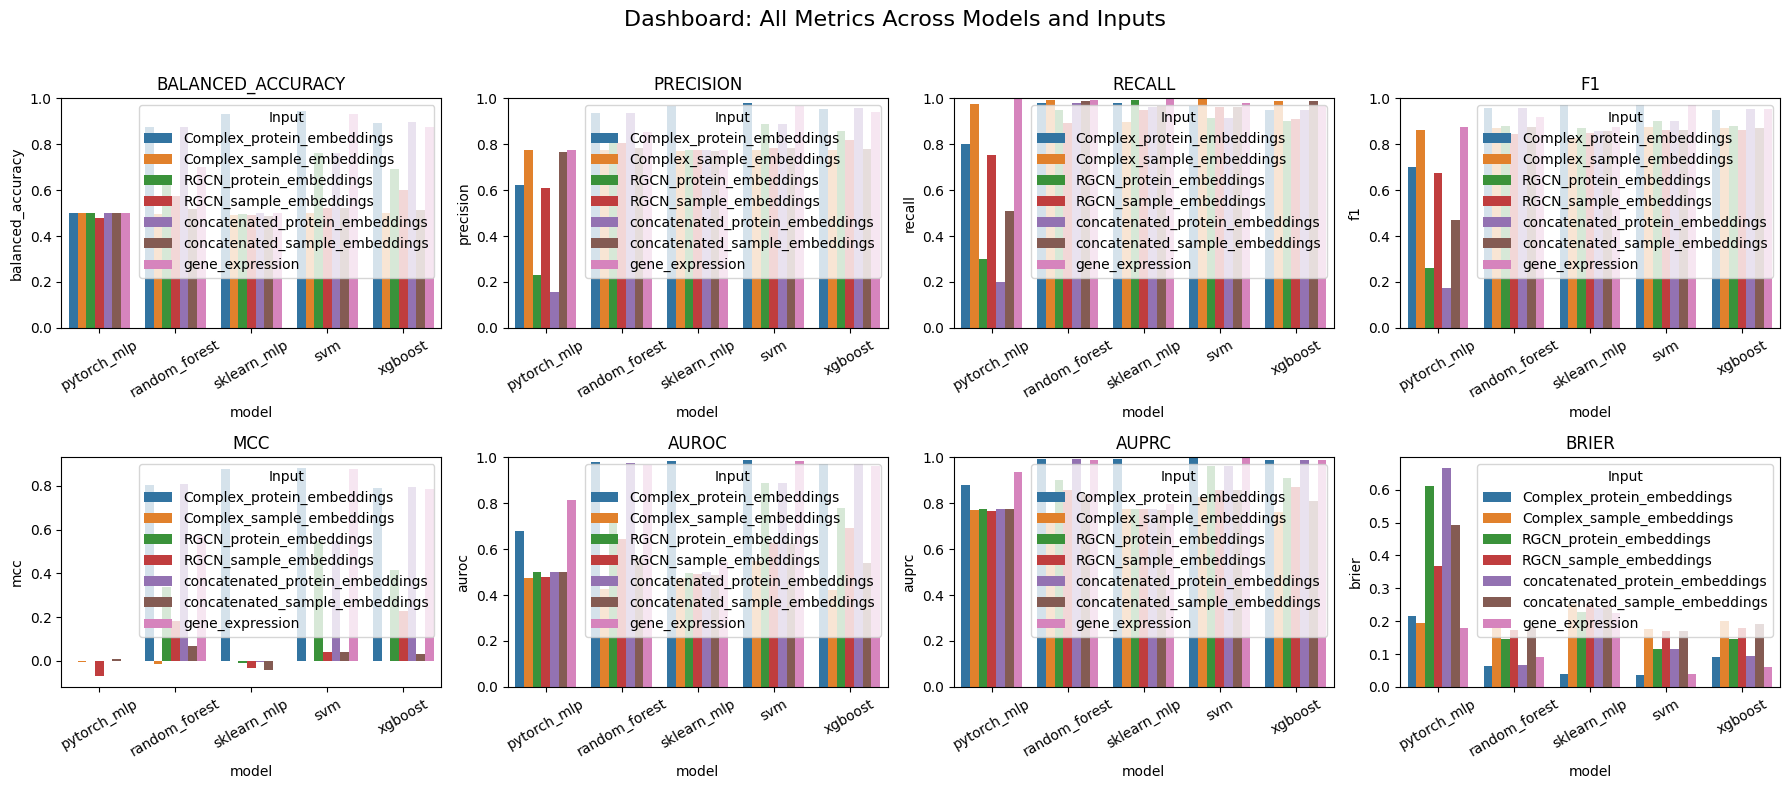

In [122]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()

### 2. heatmap

model_dataset x score matrix 

In [123]:
# metric='balanced_accuracy'

In [124]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
2,pytorch_mlp,Complex_protein_embeddings,minmax,v2.10,0.500000,0.620408,0.800000,0.698851,0.000000,0.678708,0.877657,0.216016
10,pytorch_mlp,Complex_sample_embeddings,none,v2.10,0.500478,0.775893,0.973684,0.863029,-0.005935,0.476316,0.770334,0.194676
14,pytorch_mlp,RGCN_protein_embeddings,minmax,v2.10,0.500000,0.232653,0.300000,0.262069,0.000000,0.500000,0.775510,0.610204
22,pytorch_mlp,RGCN_sample_embeddings,none,v2.10,0.477632,0.611084,0.755263,0.674657,-0.071109,0.477632,0.768166,0.369388
26,pytorch_mlp,concatenated_protein_embeddings,minmax,v2.10,0.500000,0.155102,0.200000,0.174713,0.000000,0.500000,0.775510,0.665306
34,pytorch_mlp,concatenated_sample_embeddings,none,v2.10,0.500718,0.765823,0.510526,0.470310,0.007103,0.500718,0.776327,0.493878
36,pytorch_mlp,gene_expression,none,no version,0.500000,0.775510,1.000000,0.873563,0.000000,0.815311,0.934362,0.177868
39,random_forest,Complex_protein_embeddings,minmax,v2.10,0.875837,0.938053,0.978947,0.957585,0.802802,0.978589,0.993864,0.064308
47,random_forest,Complex_sample_embeddings,none,v2.10,0.497368,0.774575,0.994737,0.870944,-0.015532,0.424402,0.745223,0.193475
51,random_forest,RGCN_protein_embeddings,minmax,v2.10,0.620455,0.823355,0.950000,0.881402,0.335878,0.758014,0.902494,0.146610


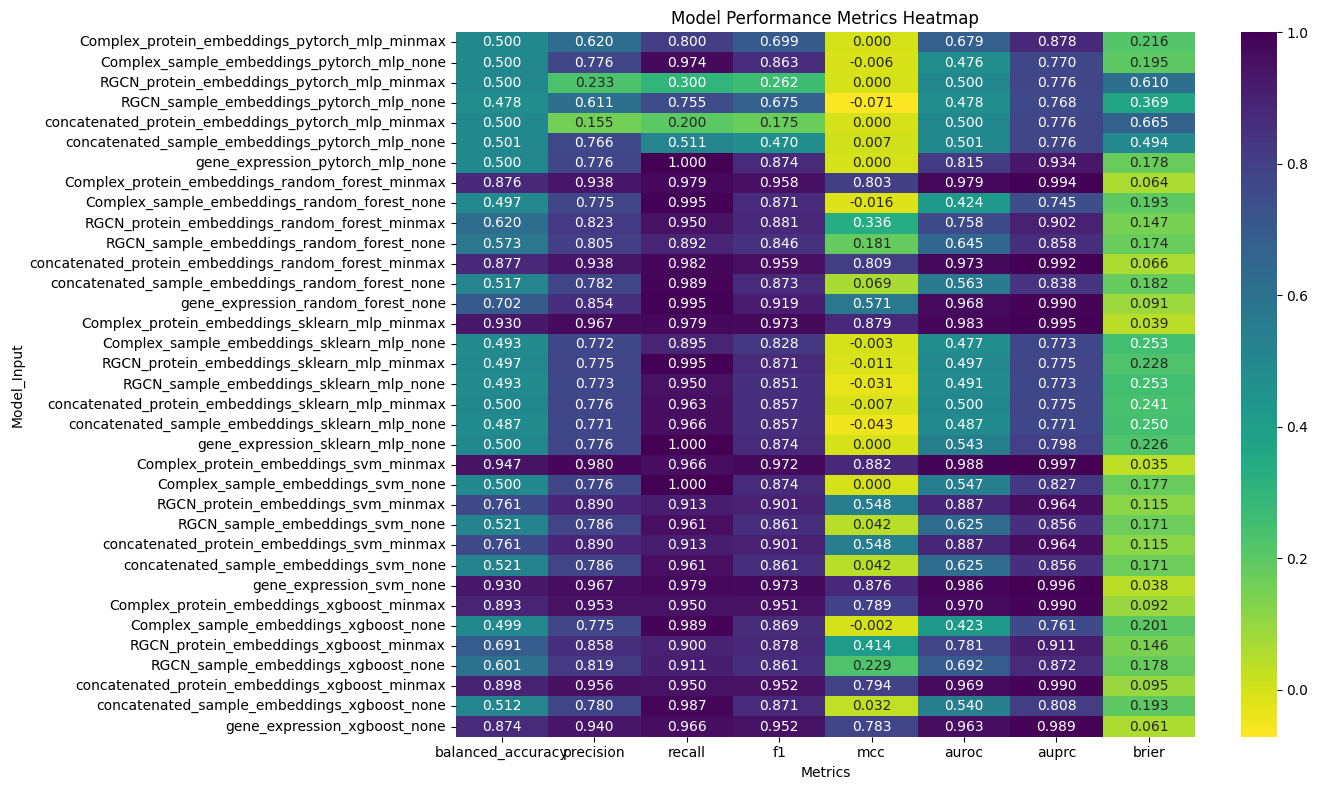

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc','auprc','brier']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results.set_index('model_input')[metrics]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 3. radar plot

To be more readbale better make a radar plot per model (one for svm, one for xgboost...)

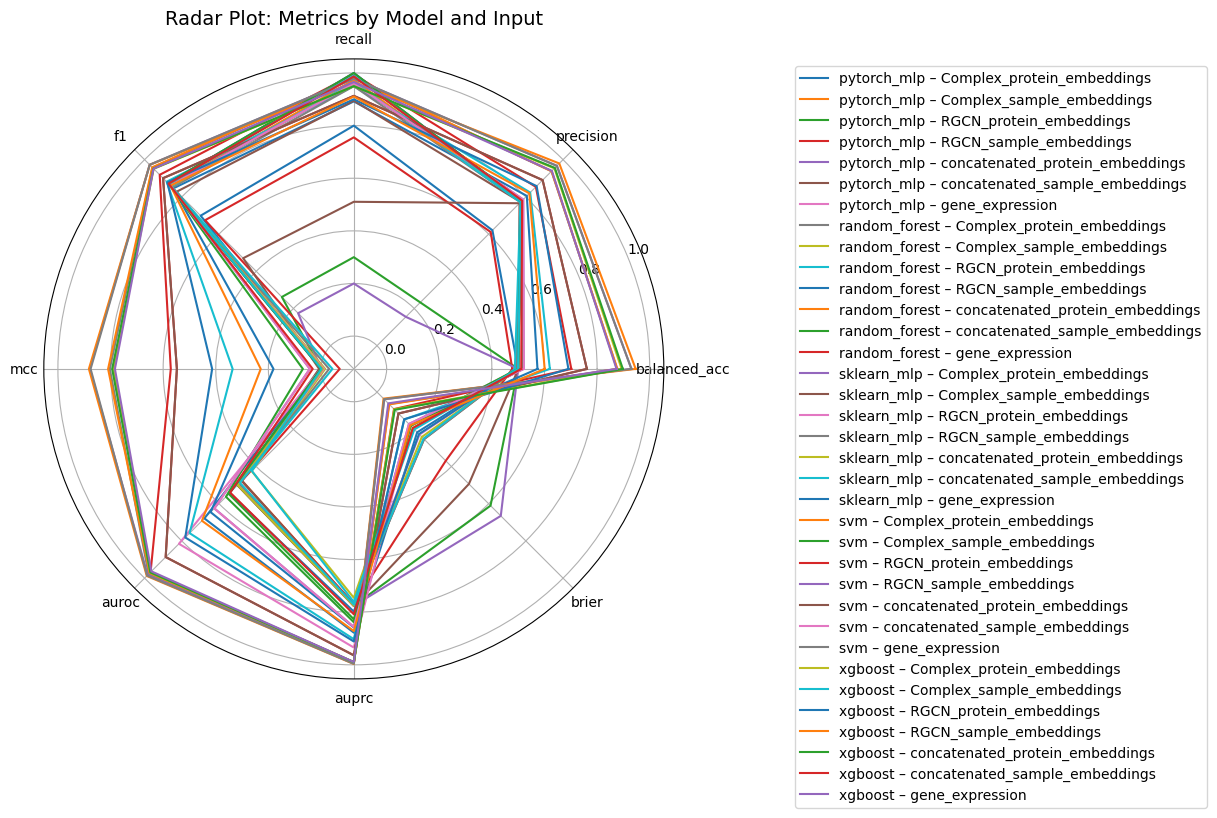

In [126]:
dashboard.plot_radar()

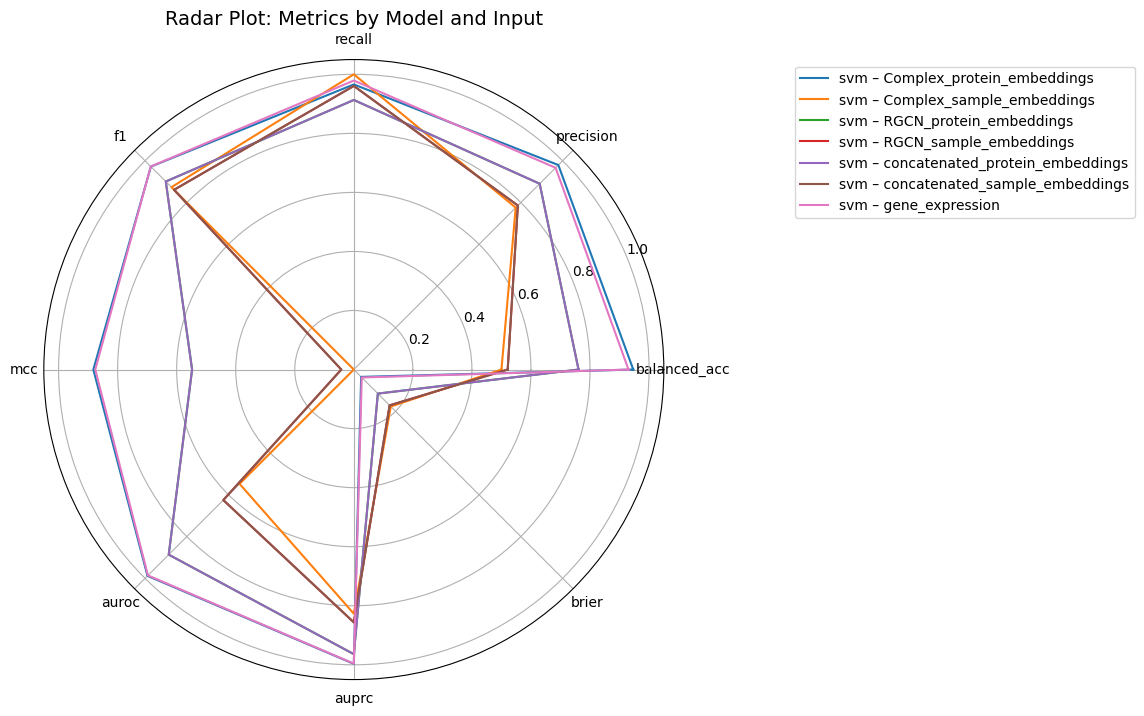

In [127]:
collector = ResultsCollector()
svm_filtered_results=filtered_results[filtered_results['model']=='svm']
dashboard = DashboardVisualizer(svm_filtered_results, collector)
dashboard.plot_radar()

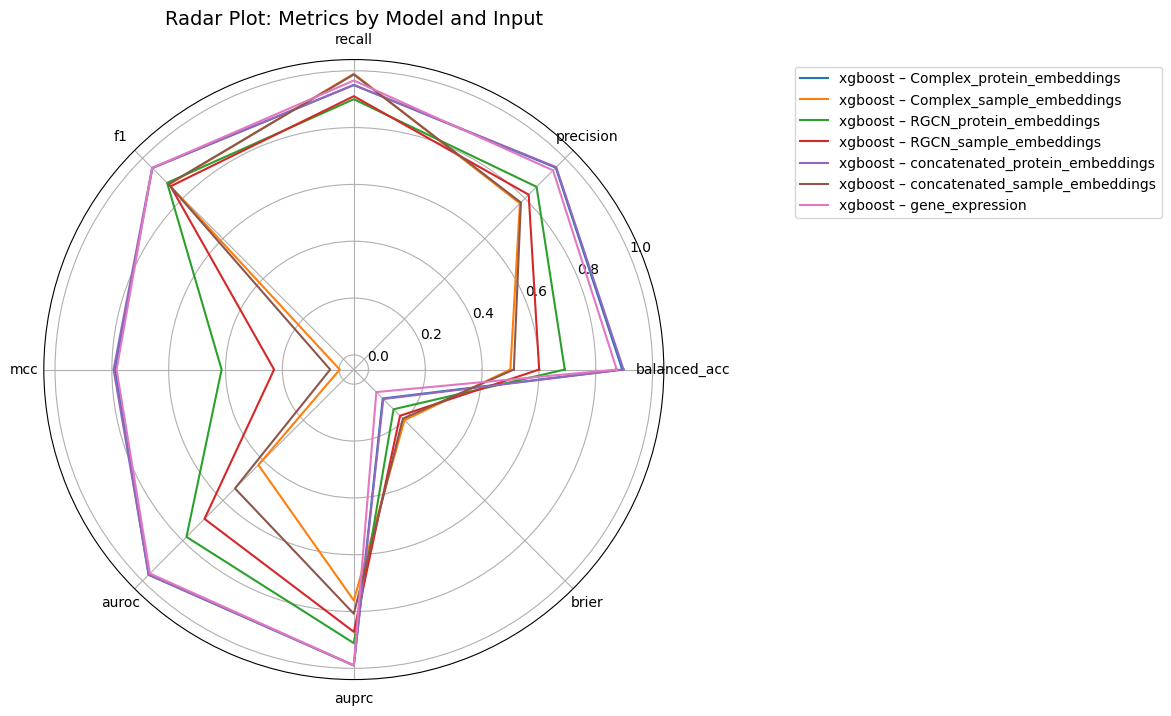

In [128]:
collector = ResultsCollector()
xgboost_filtered_results=filtered_results[filtered_results['model']=='xgboost']
dashboard = DashboardVisualizer(xgboost_filtered_results, collector)
dashboard.plot_radar()


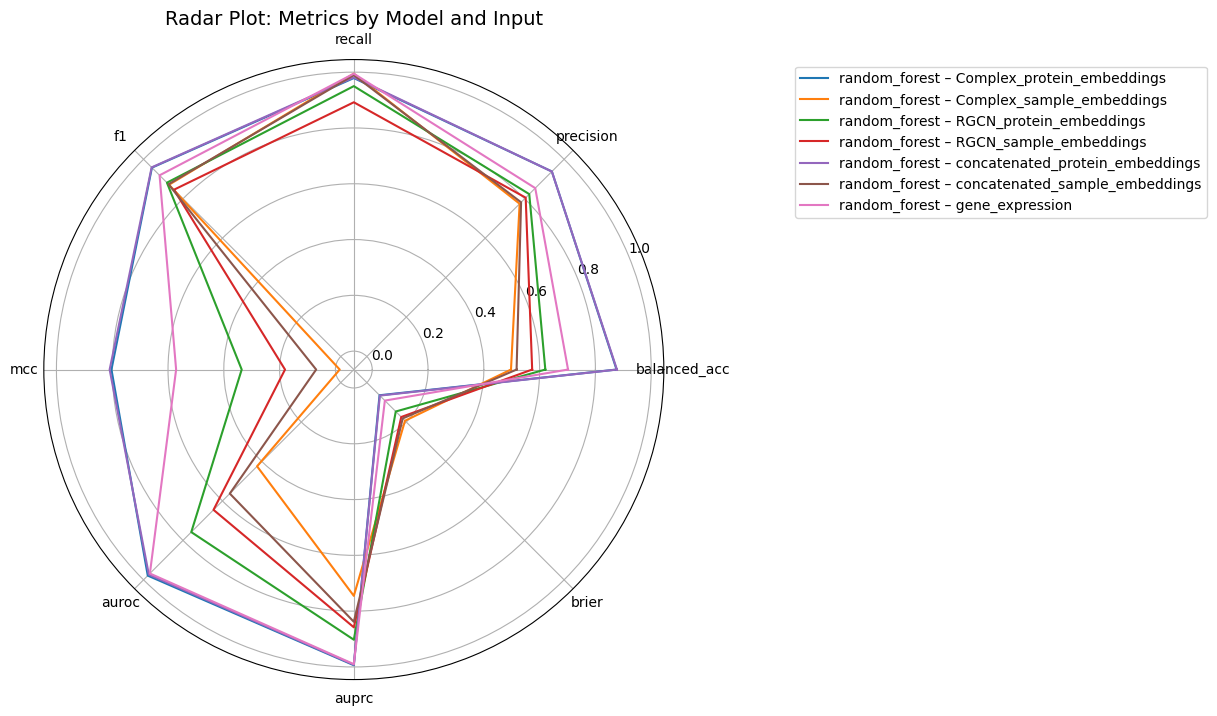

In [129]:
collector = ResultsCollector()
random_forest_filtered_results=filtered_results[filtered_results['model']=='random_forest']
dashboard = DashboardVisualizer(random_forest_filtered_results, collector)
dashboard.plot_radar()

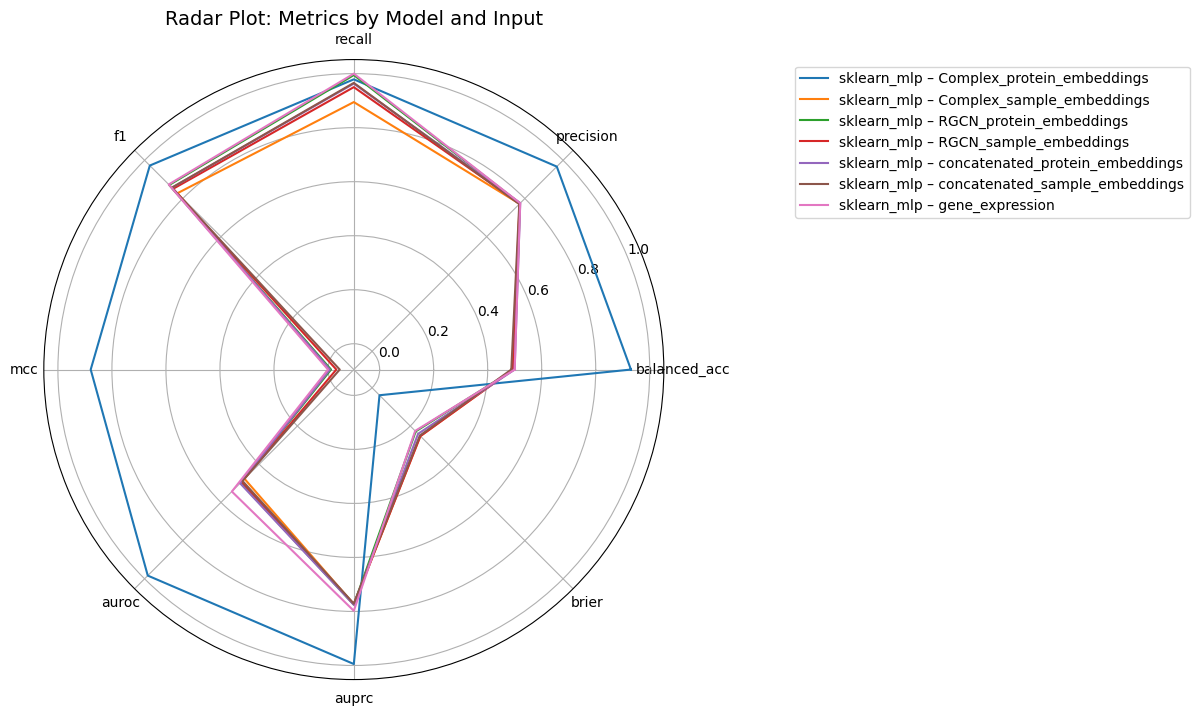

In [130]:
collector = ResultsCollector()
sklearn_mlp_filtered_results=filtered_results[filtered_results['model']=='sklearn_mlp']
dashboard = DashboardVisualizer(sklearn_mlp_filtered_results, collector)
dashboard.plot_radar()

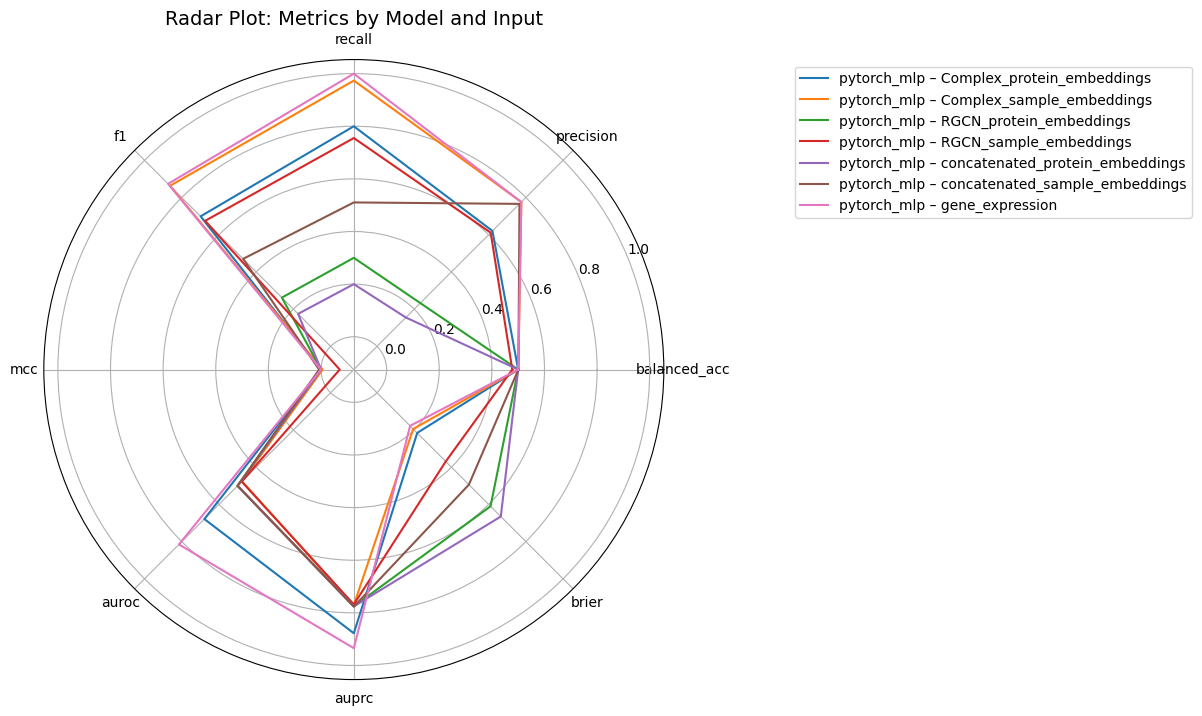

In [131]:
collector = ResultsCollector()
pytorch_mlp_filtered_results=filtered_results[filtered_results['model']=='pytorch_mlp']
dashboard = DashboardVisualizer(pytorch_mlp_filtered_results, collector)
dashboard.plot_radar()

### 5. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [132]:
metric='precision'

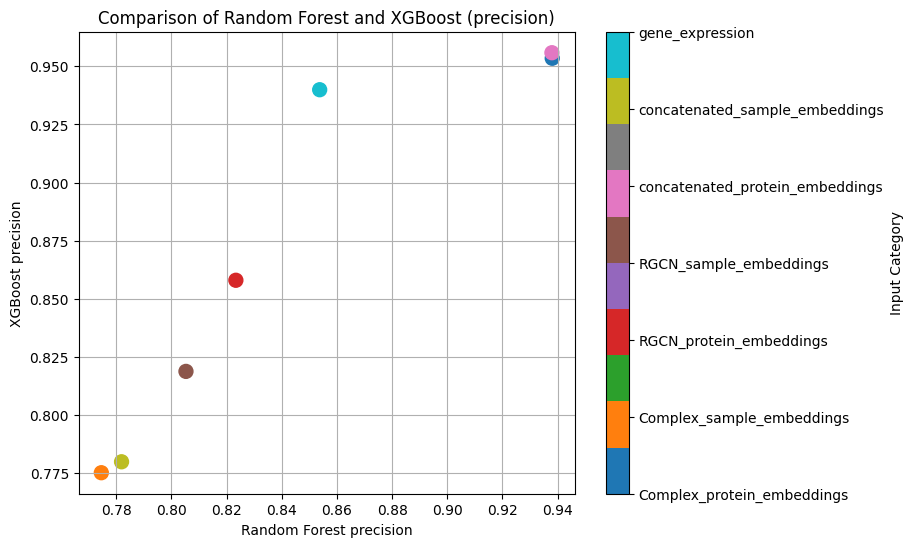

In [133]:
import matplotlib.pyplot as plt

rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', metric]]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', metric]]

merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_rf'],
    merged[metric + '_xgb'],
    s=100,
    c=merged['input'].astype('category').cat.codes,
    cmap='tab10'
)

plt.xlabel('Random Forest ' + metric)
plt.ylabel('XGBoost ' + metric)
plt.title('Comparison of Random Forest and XGBoost (' + metric + ')')
plt.grid()

cbar = plt.colorbar(scatter)
cbar.set_label('Input Category')
cbar.set_ticks(range(len(merged['input'].astype('category').cat.categories)))
cbar.set_ticklabels(merged['input'].astype('category').cat.categories)

plt.show()


### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [134]:
metric='balanced_accuracy'

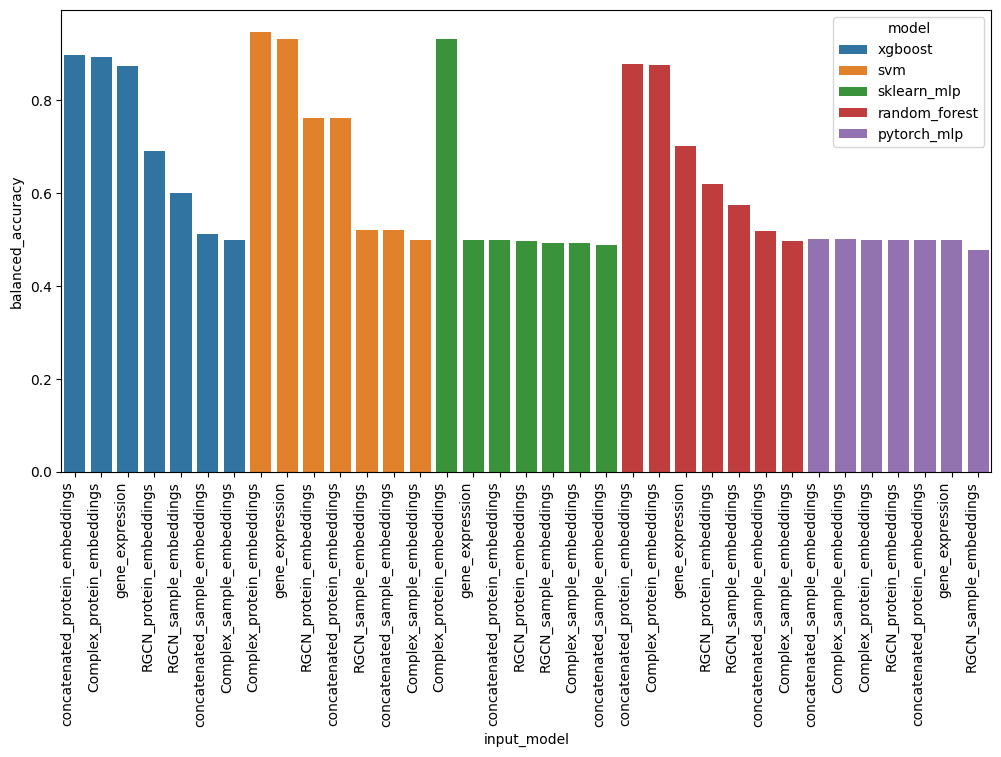

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()